In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'  # default is ‘last_expr’

%load_ext autoreload
%autoreload 2

In [ ]:
import os
import json
from collections import defaultdict

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Load data
land_cover = *Colombia Corine land cover*  
Villavicencio = *Villavicencio boundary*  
tabla_lulc_wcs = *WCS land cover classes*  
wcs_num_to_name = *WCS land cover codes*  

In [ ]:
land_cover = gpd.read_file(r'C:/Users/ricar/OneDrive/Maestría en Geomática/Percepción remota avanzada/RepositorioClasificaciónCoberturas/Replica/Datos/SHP/Cobertura_tierra_2010_2012.shp')
villavicencio = gpd.read_file(r'C:/Users/ricar/OneDrive/Maestría en Geomática/Percepción remota avanzada/RepositorioClasificaciónCoberturas/Replica\Datos/villavicencio.geojson')
tabla_lulc_wcs = pd.read_excel(r'C:/Users/ricar/OneDrive/Maestría en Geomática/Percepción remota avanzada/RepositorioClasificaciónCoberturas/Replica/Datos/tabla_lulc_wcs.xlsx')
wcs_num_to_name = pd.read_excel(r'C:/Users/ricar/OneDrive/Maestría en Geomática/Percepción remota avanzada/RepositorioClasificaciónCoberturas/Replica/Datos/wcs_num_to_name.xlsx')

C:\Users\ricar\AppData\Local\Temp\ipykernel_21360\883298363.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4686
Right CRS: EPSG:4326

  land_coverVillavicencio = gpd.clip(land_cover, villavicencio)


## Preprocessing
1. Reproyect layers
2. clip land cover to AOI
3. Merge WCS labels to Villavicencio Corine Land Cover

In [76]:
villavicencio.to_crs(epsg=9377, inplace=True)
land_cover.to_crs(epsg=9377, inplace=True)
land_coverVillavicencio = gpd.clip(land_cover, villavicencio)

In [77]:
landcover_joined = land_coverVillavicencio.merge(
    tabla_lulc_wcs,
    how="left",
    left_on="LEYENDA3N",   
    right_on="LULC_spanish"    
)

landcover_joined = landcover_joined.merge(
    wcs_num_to_name,
    how="left",
    left_on="Class_WCS",   
    right_on="Label"     
)

In [ ]:
landcover_joined


,OBJECTID_1,OBJECTID,APOYO,CAMBIO,CONFIABILI,INSUMO,CODIGO,AREA_HA,LEYENDA3N,Shape_Leng,...,Shape_Area,RULEID,geometry,Raster_val,LULC_spanish,LULC_english,Class_WCS,Class_WCS_202004,ID,Label
0,48220,48275,None,2,Si,Mosaico Landsat 2010-2012 (Avg_2575),32112,29.075383,3.2.1. Herbazal,0.028716,...,0.000024,36,"POLYGON ((-73.32908 3.96952, -73.32925 3.96945...",27,3.2.1. Herbazal,Grassland,Savanna,Savanna,17,Savanna
1,48092,48147,None,1,Si,Mosaico Landsat 2010-2012 (Avg_2575),242,18972.273506,2.4.2. Mosaico de pastos y cultivos,1.719161,...,0.015447,27,"MULTIPOLYGON (((-73.17527 3.98951, -73.17543 3...",19,2.4.2. Mosaico de pastos y cultivos,Crops and pastures mosaic,Other agricultural areas,Other agricultural areas,11,Other agricultural areas
2,48125,48180,None,1,Si,Mosaico Landsat 2010-2012 (Avg_2575),2232,74.681495,2.2.3. Cultivos permanentes arboreos,0.037644,...,0.000061,20,"POLYGON ((-73.33445 4.01198, -73.33599 4.01234...",14,2.2.3. Cultivos permanentes arboreos,Permanent arboreal crops,Other permanent arboreal crops,Other permanent arboreal crops,7,Other permanent arboreal crops
3,48123,48178,None,1,Si,Mosaico Landsat 2010-2012 (Avg_2575),2232,59.676164,2.2.3. Cultivos permanentes arboreos,0.032294,...,0.000049,20,"POLYGON ((-73.34563 4.02684, -73.3455 4.02689,...",14,2.2.3. Cultivos permanentes arboreos,Permanent arboreal crops,Other permanent arboreal crops,Other permanent arboreal crops,7,Other permanent arboreal crops
4,48105,48160,None,2,Si,Mosaico Landsat 2010-2012 (Avg_2575),244,229.867038,2.4.4. Mosaico de pastos con espacios naturales,0.122857,...,0.000187,29,"POLYGON ((-73.31793 4.04025, -73.31793 4.0401,...",21,2.4.4. Mosaico de pastos con espacios naturales,Pastures and natural spaces mosaic,Other agricultural areas,Other agricultural areas,11,Other agricultural areas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,123465,123527,None,2,Si,Mosaico Landsat 2010-2012 (Avg_2575),243,97.715927,"2.4.3. Mosaico de cultivos, pastos y espacios ...",0.077768,...,0.000080,28,"POLYGON ((-73.6201 4.21435, -73.6201 4.21411, ...",20,"2.4.3. Mosaico de cultivos, pastos y espacios ...","Mosaic of crops, pastures, and natural spaces",Other agricultural areas,Other agricultural areas,11,Other agricultural areas
320,123459,123521,None,0,None,Mosaico Landsat 2010-2012 (Avg_2575),3132,225.648482,3.1.3. Bosque fragmentado,0.175301,...,0.000184,33,"POLYGON ((-73.60194 4.20811, -73.60174 4.20793...",24,3.1.3. Bosque fragmentado,Fragmented forest,Fragmented forest,Fragmented forest,14,Fragmented forest
321,123435,123497,None,2,Si,Mosaico Landsat 2010-2012 (Avg_2575),243,1659.285968,"2.4.3. Mosaico de cultivos, pastos y espacios ...",0.461706,...,0.001352,28,"POLYGON ((-73.639 4.28058, -73.639 4.28057, -7...",20,"2.4.3. Mosaico de cultivos, pastos y espacios ...","Mosaic of crops, pastures, and natural spaces",Other agricultural areas,Other agricultural areas,11,Other agricultural areas
322,125533,125595,None,2,Si,Mosaico Landsat 2010-2012 (Avg_2575),3131,5903.165847,3.1.3. Bosque fragmentado,1.586433,...,0.004809,33,"MULTIPOLYGON (((-73.60563 4.22022, -73.60567 4...",24,3.1.3. Bosque fragmentado,Fragmented forest,Fragmented forest,Fragmented forest,14,Fragmented forest


In [80]:
landcover_joined = landcover_joined[["LEYENDA3N", "Class_WCS", "ID","geometry"]]

In [82]:
wcs_num_to_color = {
  "0": "black",
  "1": "lightgray",
  "2": "lightsteelblue",
  "3": "sienna",
  "4": "lavender",
  "5": "teal",
  "6": "lightsalmon",
  "7": "olive",
  "8": "salmon",
  "9": "sandybrown",
  "10": "goldenrod",
  "11": "darkkhaki",
  "12": "darkseagreen",
  "13": "mediumseagreen",
  "14": "lightgreen",
  "15": "limegreen",
  "16": "tan",
  "17": "gold",
  "18": "orange",
  "19": "hotpink",
  "20": "blanchedalmond",
  "21": "slategray",
  "22": "rosybrown",
  "23": "firebrick",
  "24": "powderblue",
  "25": "darkolivegreen",
  "26": "dodgerblue",
  "27": "deepskyblue",
  "28": "darkturquoise",
  "29": "whitesmoke",
  "30": "pink",
  "31": "plum",
  "32": "khaki",
  "33": "thistle"
}

# Convertir diccionario a DataFrame
df_colors = pd.DataFrame.from_dict(wcs_num_to_color, orient="index", columns=["color"]).reset_index()
df_colors.rename(columns={"index": "code"}, inplace=True)


df_colors["code"] = df_colors["code"].astype(int)

landcover_joined["ID"] = landcover_joined["ID"].astype(int)

# Merge
landcover_joined = landcover_joined.merge(
    df_colors,
    how="left",
    left_on="ID",
    right_on="code"
)

c:\Users\ricar\AppData\Local\Programs\Python\Python313\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [83]:
landcover_joined["area"] = landcover_joined.geometry.area / 10000
 

In [84]:
landcover_joined

,LEYENDA3N,Class_WCS,ID,geometry,code,color,area
0,2.3.1. Pastos limpios,Intensive livestock,8,"MULTIPOLYGON (((4980558.878 1993497.251, 49805...",8,salmon,1939.864172
1,2.2.3. Cultivos permanentes arboreos,Other permanent arboreal crops,7,"POLYGON ((4980162.85 1994480.755, 4980006.21 1...",7,olive,115.940266
2,3.1.1. Bosque denso,Dense forest,12,"POLYGON ((4980526.518 1996705.656, 4980476.105...",12,darkseagreen,27.210575
3,2.4.4. Mosaico de pastos con espacios naturales,Other agricultural areas,11,"POLYGON ((4980572.697 1996925.971, 4980569.324...",11,darkkhaki,33.861907
4,3.2.1. Herbazal,Savanna,17,"POLYGON ((4963483.478 1996639.852, 4963464.849...",17,gold,29.024968
...,...,...,...,...,...,...,...
319,"2.4.3. Mosaico de cultivos, pastos y espacios ...",Other agricultural areas,11,"POLYGON ((4931209.707 2023711.344, 4931209.702...",11,darkkhaki,26.640216
320,3.1.3. Bosque fragmentado,Fragmented forest,14,"POLYGON ((4933223.593 2023019.679, 4933246.402...",14,lightgreen,15.319226
321,"2.4.3. Mosaico de cultivos, pastos y espacios ...",Other agricultural areas,11,"POLYGON ((4929119.316 2031031.051, 4929119.439...",11,darkkhaki,1398.723990
322,3.1.3. Bosque fragmentado,Fragmented forest,14,"MULTIPOLYGON (((4932815.792 2024359.058, 49328...",14,lightgreen,470.940211


# Visualize data

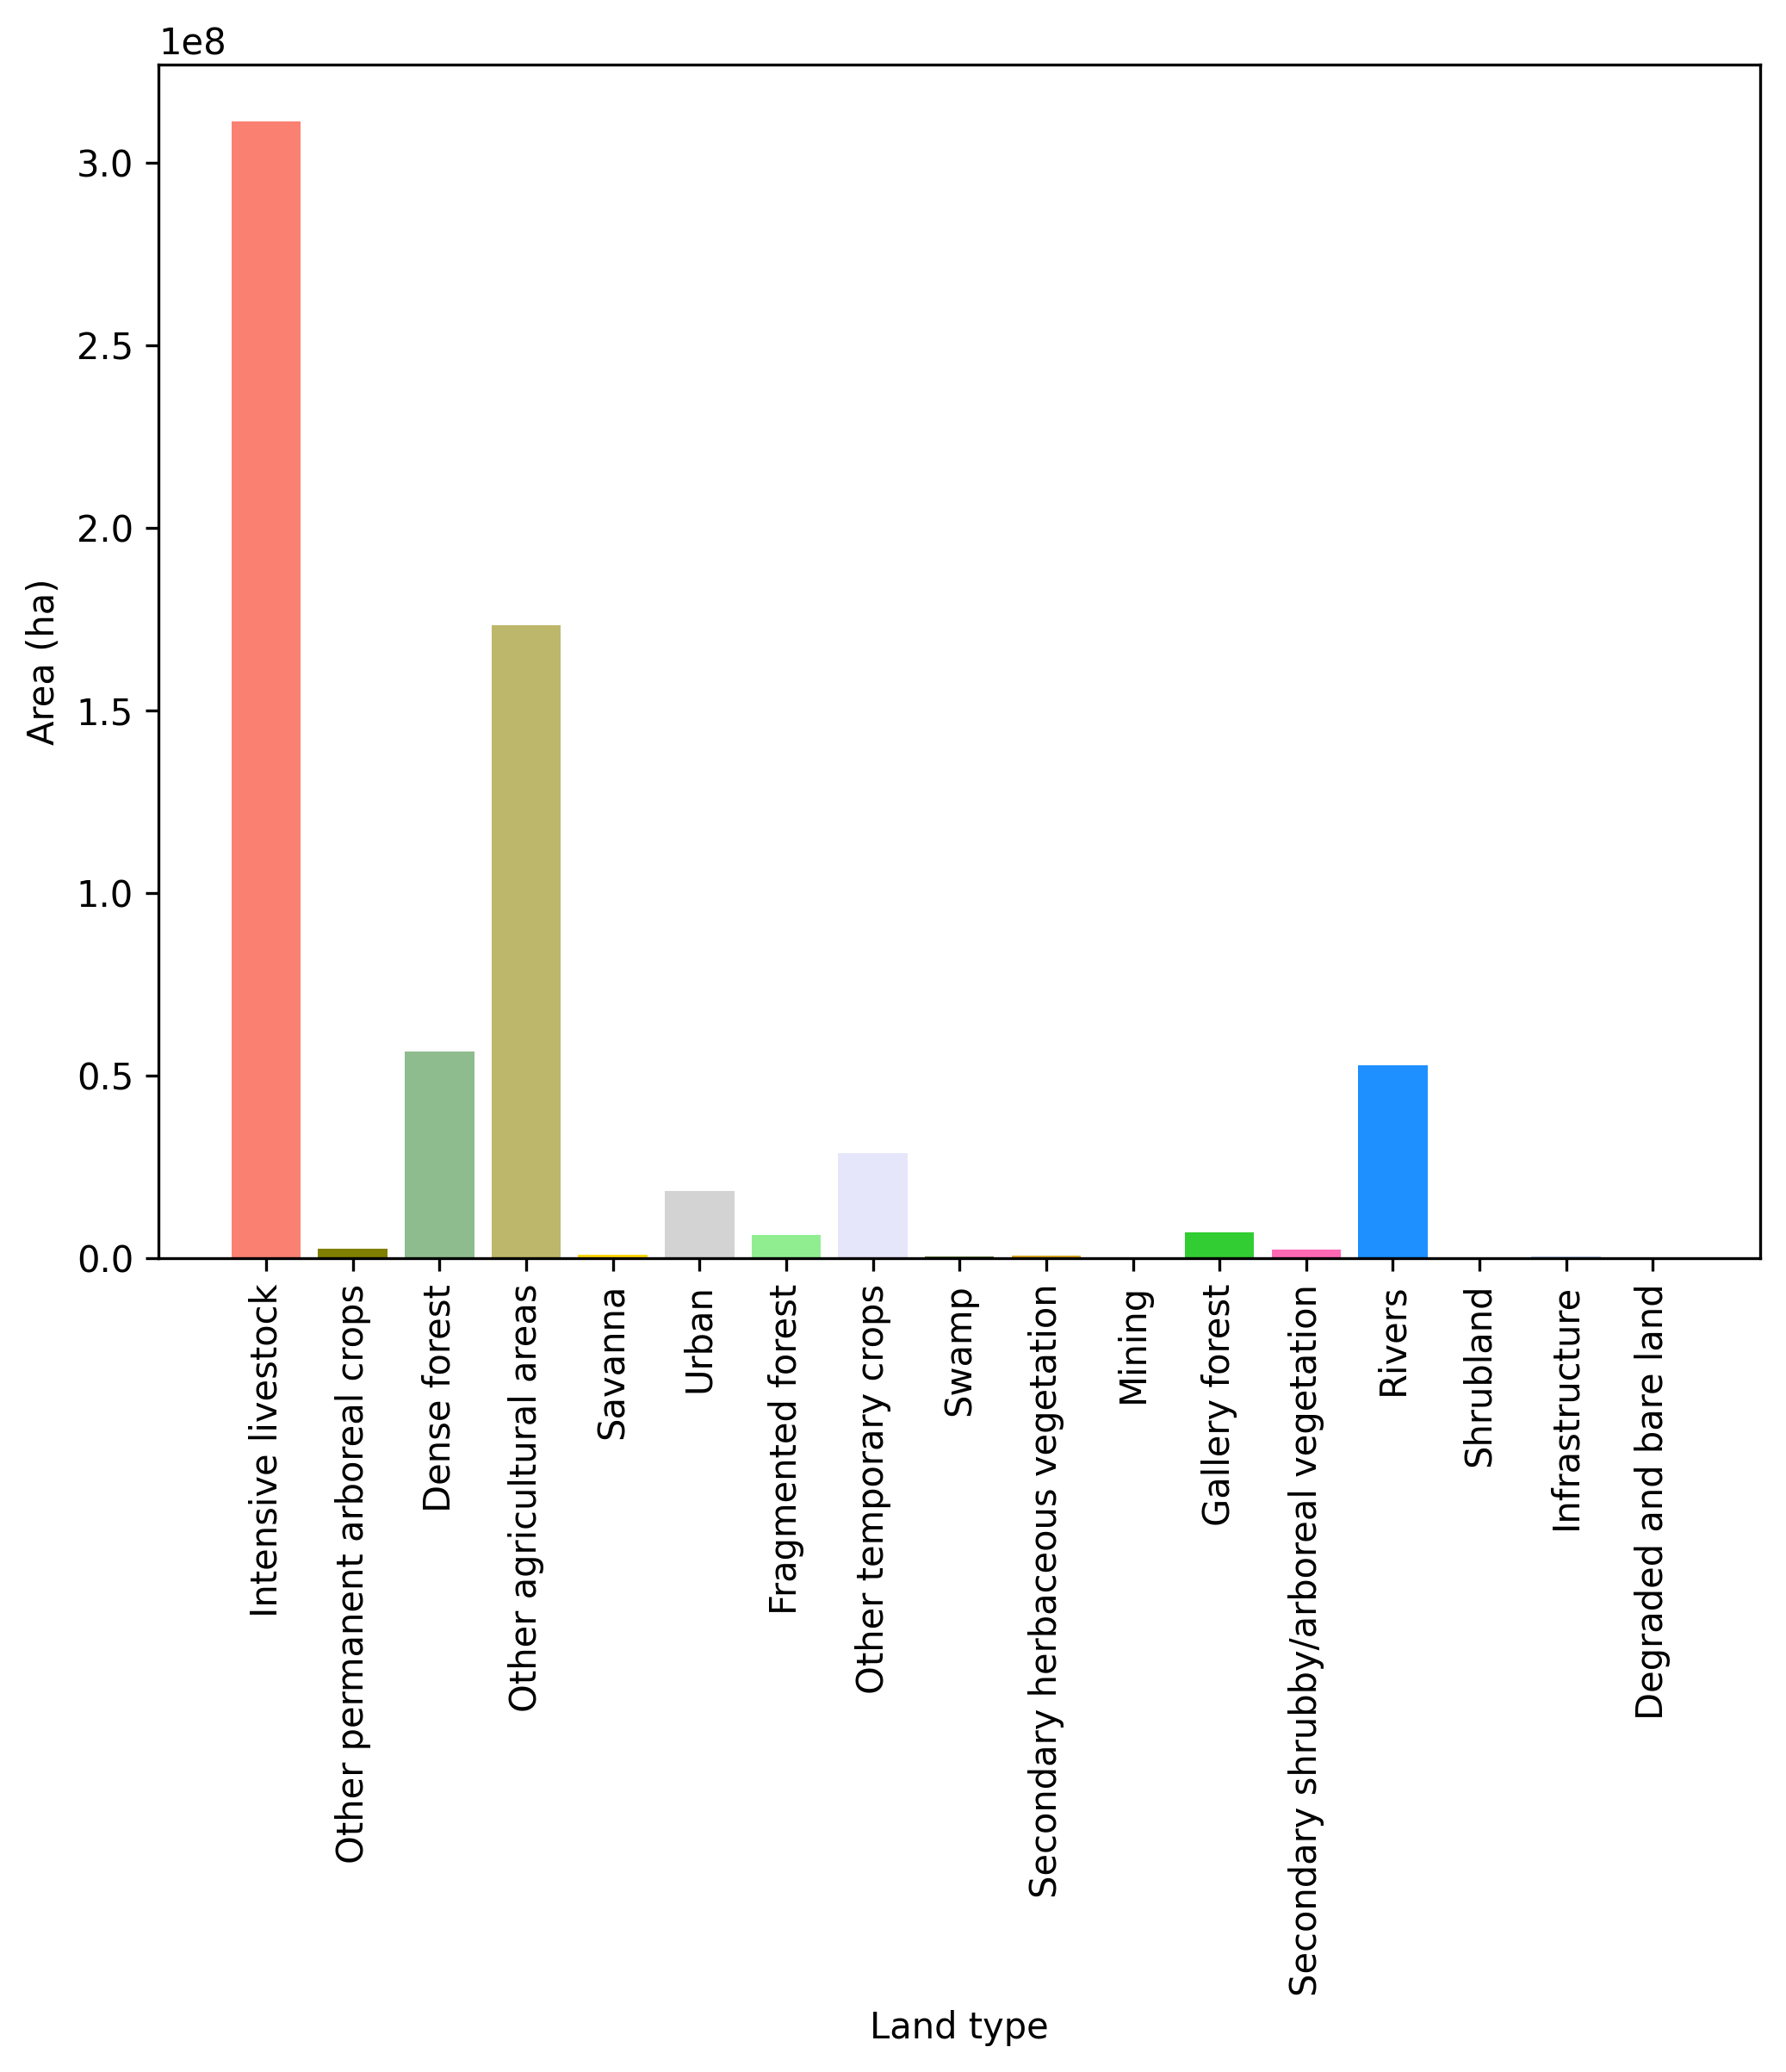

In [ ]:
# TODO sort this

# can't use df.plot because of individual bar coloring

fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot(111)

_ = plt.bar(landcover_joined.Class_WCS, landcover_joined.area, color=landcover_joined.color)

_ = plt.xticks(rotation=90)

_ = ax.set_ylabel('Area (ha)')
_ = ax.set_xlabel('Land type')

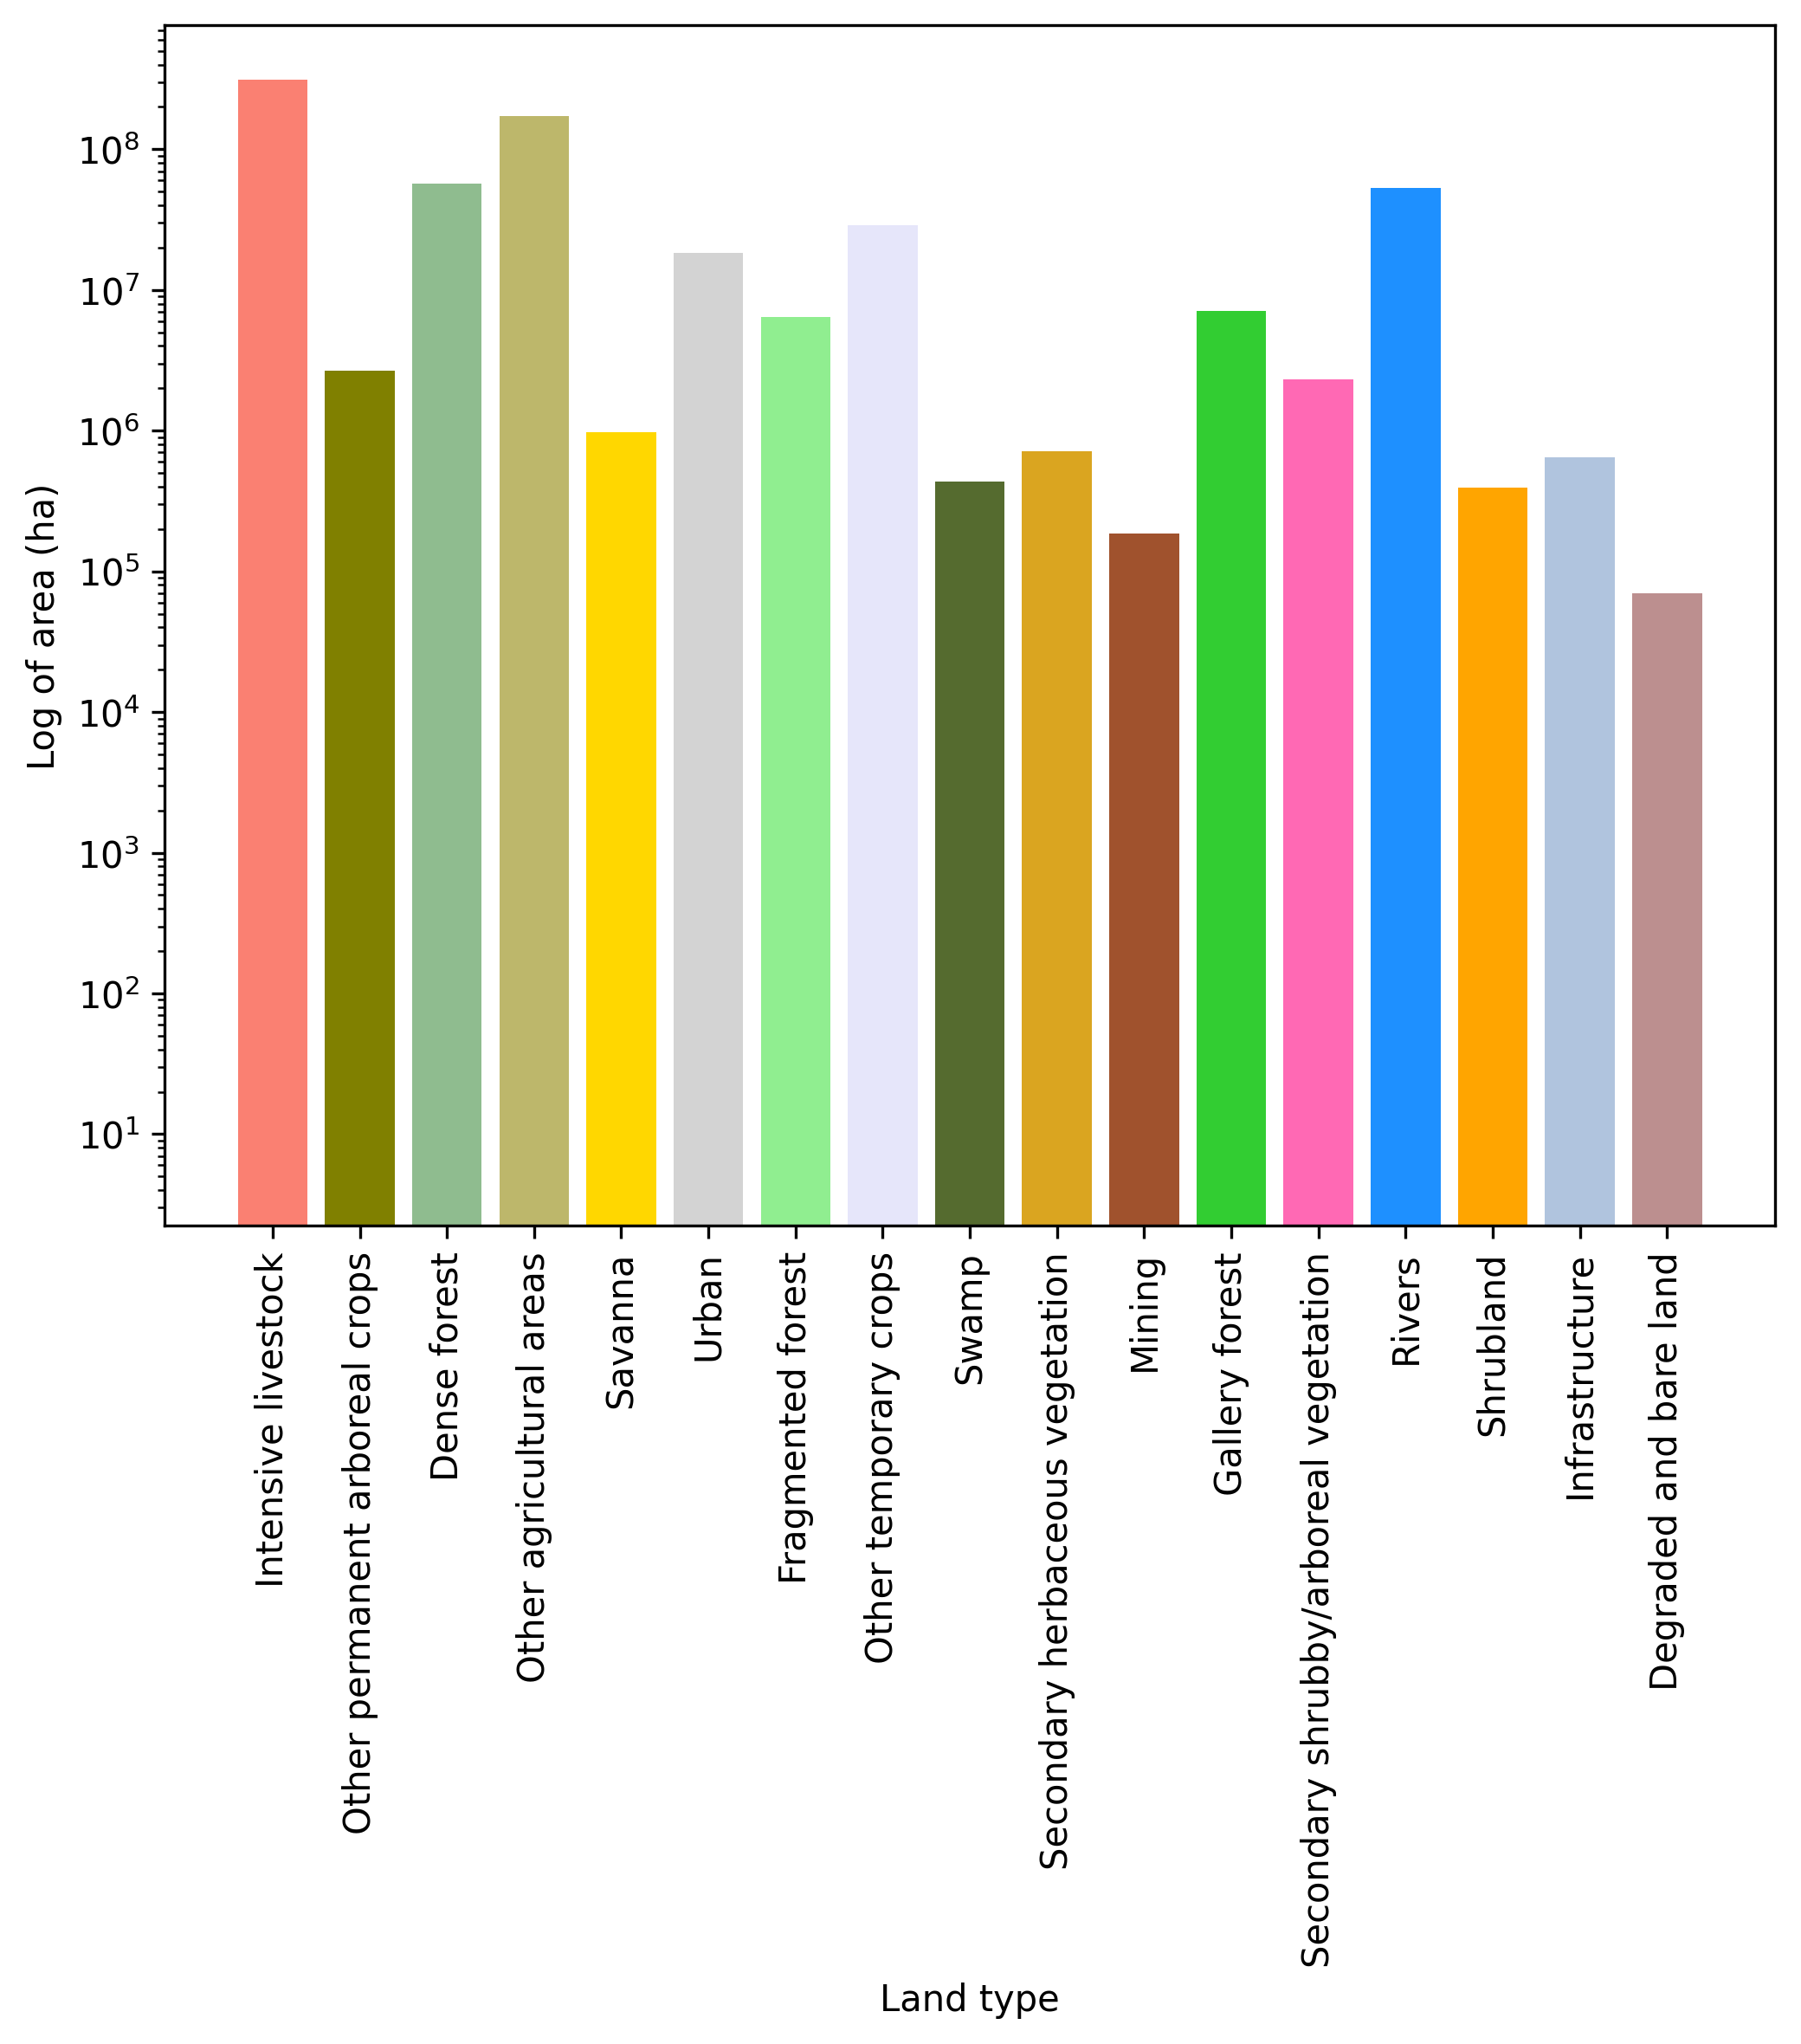

In [86]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = plt.subplot(111)

_ = plt.bar(landcover_joined.Class_WCS, landcover_joined.area, color=landcover_joined.color)

_ = plt.xticks(rotation=90)

_ = ax.set_yscale('log')

_ = ax.set_ylabel('Log of area (ha)')
_ = ax.set_xlabel('Land type')

In [87]:
landcover_joined.to_file(r'C:/Users/ricar/OneDrive/Maestría en Geomática/Percepción remota avanzada/RepositorioClasificaciónCoberturas/Replica/Datos/villavicencioWCS.gpkg', driver="GPKG") 